<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-business-metrics-and-unit-economics" data-toc-modified-id="Analysis-of-business-metrics-and-unit-economics-1">Analysis of business metrics and unit economics</a></span><ul class="toc-item"><li><span><a href="#1.-Data-importing-and-cleaning" data-toc-modified-id="1.-Data-importing-and-cleaning-1.1">1. Data importing and cleaning</a></span><ul class="toc-item"><li><span><a href="#Recap" data-toc-modified-id="Recap-1.1.1">Recap</a></span></li></ul></li><li><span><a href="#2.-Calculating-and-analyzing-the-metrics" data-toc-modified-id="2.-Calculating-and-analyzing-the-metrics-1.2">2. Calculating and analyzing the metrics</a></span></li><li><span><a href="#2.1.-Product" data-toc-modified-id="2.1.-Product-1.3">2.1. Product</a></span><ul class="toc-item"><li><span><a href="#DAU,-WAU,-MAU" data-toc-modified-id="DAU,-WAU,-MAU-1.3.1">DAU, WAU, MAU</a></span></li><li><span><a href="#User-sessions" data-toc-modified-id="User-sessions-1.3.2">User sessions</a></span></li><li><span><a href="#Average-session-load-(ASL)" data-toc-modified-id="Average-session-load-(ASL)-1.3.3">Average session load (ASL)</a></span></li><li><span><a href="#Retention-Rate" data-toc-modified-id="Retention-Rate-1.3.4">Retention Rate</a></span></li><li><span><a href="#Recap" data-toc-modified-id="Recap-1.3.5">Recap</a></span></li></ul></li><li><span><a href="#2.2.-Sales" data-toc-modified-id="2.2.-Sales-1.4">2.2. Sales</a></span><ul class="toc-item"><li><span><a href="#Time-till-first-purchase-by-site-visitor" data-toc-modified-id="Time-till-first-purchase-by-site-visitor-1.4.1">Time till first purchase by site visitor</a></span></li><li><span><a href="#Average-amount-of-purchases-per-user-in-1-month-and-6-month-period" data-toc-modified-id="Average-amount-of-purchases-per-user-in-1-month-and-6-month-period-1.4.2">Average amount of purchases per user in 1-month and 6-month period</a></span></li><li><span><a href="#Average-check-in-one-day-and-on-timeline" data-toc-modified-id="Average-check-in-one-day-and-on-timeline-1.4.3">Average check in one day and on timeline</a></span></li><li><span><a href="#LTV-per-user-in-cohorts-on-average-for-6-months" data-toc-modified-id="LTV-per-user-in-cohorts-on-average-for-6-months-1.4.4">LTV per user in cohorts on average for 6 months</a></span></li><li><span><a href="#Recap" data-toc-modified-id="Recap-1.4.5">Recap</a></span></li></ul></li><li><span><a href="#2.3.-Marketing" data-toc-modified-id="2.3.-Marketing-1.5">2.3. Marketing</a></span><ul class="toc-item"><li><span><a href="#Marketing-costs:-total,-by-traffic-channels,-in-dynamics" data-toc-modified-id="Marketing-costs:-total,-by-traffic-channels,-in-dynamics-1.5.1">Marketing costs: total, by traffic channels, in dynamics</a></span></li><li><span><a href="#Average-CAC-per-user,-per-channel-and-in-dynamics" data-toc-modified-id="Average-CAC-per-user,-per-channel-and-in-dynamics-1.5.2">Average CAC per user, per channel and in dynamics</a></span></li><li><span><a href="#ROMI-per-traffic-source-and-payback-by-cohort" data-toc-modified-id="ROMI-per-traffic-source-and-payback-by-cohort-1.5.3">ROMI per traffic source and payback by cohort</a></span></li><li><span><a href="#Recap" data-toc-modified-id="Recap-1.5.4">Recap</a></span></li></ul></li><li><span><a href="#3.-Conclusion-and-recommendations" data-toc-modified-id="3.-Conclusion-and-recommendations-1.6">3. Conclusion and recommendations</a></span></li></ul></li></ul></div>

# Analysis of business metrics and unit economics

Our task is to make an analysis of business metrics for Yandex.Afisha. Problem: to reduce marketing costs and make a reasonable decision on which traffic channels are not effective. 

We have data on site visits, purchases and ad costs from June 2017 till May 2018.  

Steps of analysis:
- how clients use our platform, 
- when do they do their first purchases,  
- what is LTV, 
- when customer aquisition costs are paid back.   

## 1. Data importing and cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Let's look at the datasets. The first one is with data on the users' visits to the platform.

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')

In [3]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Let's change data types on `datetime` where needed and titles of the columns. 

In [5]:
visits.columns = ['device', 'end_session', 'source_id', 'start_session', 'uid']

In [6]:
visits['end_session'] = pd.to_datetime(visits['end_session'])

In [7]:
visits['start_session'] = pd.to_datetime(visits['start_session'])

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device           359400 non-null object
end_session      359400 non-null datetime64[ns]
source_id        359400 non-null int64
start_session    359400 non-null datetime64[ns]
uid              359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


The second dataset has information on users' orders.

In [9]:
orders = pd.read_csv('/datasets/orders_log.csv')

In [10]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Let's change data types on `datetime` and titles of the columns. 

In [12]:
orders.columns = ['order_date', 'revenue', 'uid']

In [13]:
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
order_date    50415 non-null datetime64[ns]
revenue       50415 non-null float64
uid           50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


The third dataset has information on the each marketing channel costs.

In [15]:
costs = pd.read_csv('/datasets/costs.csv')

In [16]:
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Let's change data types on `datetime` and titles of the columns.

In [18]:
costs.columns = ['source_id', 'ad_date', 'costs']

In [19]:
costs['ad_date'] = pd.to_datetime(costs['ad_date'])

Also we need to check if our dataframes have missing values and duplicates.

In [20]:
visits.isna().sum()

device           0
end_session      0
source_id        0
start_session    0
uid              0
dtype: int64

In [21]:
orders.isna().sum()

order_date    0
revenue       0
uid           0
dtype: int64

In [22]:
costs.isna().sum()

source_id    0
ad_date      0
costs        0
dtype: int64

In [23]:
visits.duplicated().sum()

0

In [24]:
orders.duplicated().sum()

0

In [25]:
costs.duplicated().sum()

0

### Recap

We have 3 datasets with data on website visits, users' orders and marketing costs. We've made some data cleaning and changed data types where needed, checked missing values and duplicates. 

## 2. Calculating and analyzing the metrics

Let's dive into the following points:

- **ABOUT PRODUCT**:
- How many people use our platform daily, weekly and monthly (what are DAU, WAU, MAU)?
- How many sessions a day does a user have?
- Average session load(ASL)?
- What is our retention rate(RR)?

- **ABOUT SALES**:
- When do customers start to purchase?
- How many purchases a month do we have?
- Average check per user?
- What is users' lifetime value (LTV)?

- **ABOUT MARKETING COSTS**:
- How much money was spent on marketing (in general, per channel, in time)?
- What is our customer acquisition cost (CAC)?
- Did we recoup our costs (what's ROI)?

## 2.1. Product

### DAU, WAU, MAU 

To calculate metrics let's add columns with days,months, years.

In [26]:
visits['year_session']  = visits['start_session'].dt.year
visits['month_session'] = visits['start_session'].dt.month
visits['week_session']  = visits['start_session'].dt.week
visits['date_session'] = visits['start_session'].dt.date

Average metrics:

In [27]:
dau_avg = (
    visits.groupby(['year_session', 'date_session'])
    .agg({'uid' : 'nunique'})
    .mean()
    .round()
) 

In [28]:
wau_avg = (
    visits.groupby(['year_session', 'week_session'])
    .agg({'uid' : 'nunique'})
    .mean()
    .round()
) 

In [29]:
mau_avg = (
    visits.groupby(['year_session', 'month_session'])
    .agg({'uid' : 'nunique'})
    .mean()
    .round()
) 

In [30]:
print('DAU = {}, WAU = {}, MAU = {}'.format(int(dau_avg),int(wau_avg),int(mau_avg)))

DAU = 908, WAU = 5716, MAU = 23228


Let's look at the same metrics in dynamics.

In [31]:
dau_dynamics = visits.groupby(['date_session']).agg({'uid' : 'nunique'}).reset_index()

In [32]:
dau_dynamics.sort_values(by='uid', ascending=False)

,date_session,uid
176,2017-11-24,3319
363,2018-05-31,1997
177,2017-11-25,1817
245,2018-02-01,1640
298,2018-03-26,1609
...,...,...
73,2017-08-13,281
65,2017-08-05,280
72,2017-08-12,271
302,2018-03-30,131


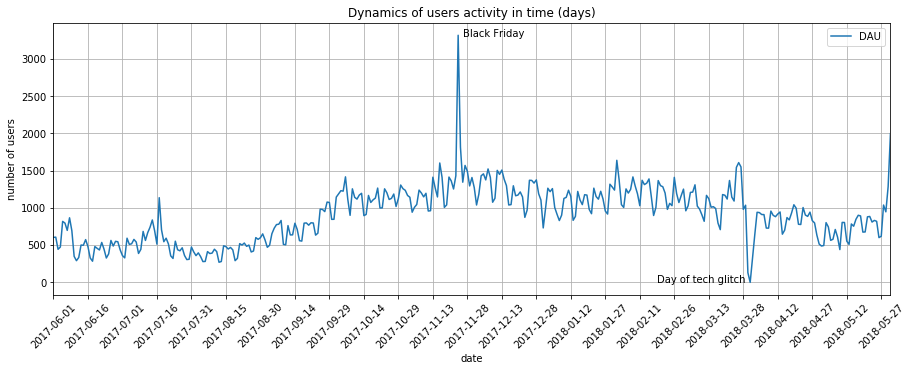

In [33]:
# dau_dynamics['date_session'] = dau_dynamics['date_session'].astype('datetime64[D]')

ax= dau_dynamics.plot(x='date_session',
                 y='uid',
                 grid=True,
                 figsize=(15, 5),
                 label='DAU')

plt.title('Dynamics of users activity in time (days)')
plt.legend()
plt.xlabel("date")
plt.ylabel("number of users")
plt.xticks(np.arange(dau_dynamics['date_session'].min(), 
                     dau_dynamics['date_session'].max() + pd.to_timedelta('1 day'), 
                     pd.to_timedelta('15 day')), 
                     rotation = 45)

ax.text('2017-11-26', 3300, "Black Friday", fontsize=10)
ax.text('2018-03-29', 0, "Day of tech glitch", fontsize=10, horizontalalignment='right')

plt.show()

We see the peak of visits at the end of November (11.24.2017, probably Black Friday) and the bottom at the end of March (03.31.2018, could be a technical glitch).

In [34]:
# transforming timestamp as 1st weekday 
visits['week_session']  = visits['start_session'].astype('datetime64[W]')

In [35]:
wau_dynamics = visits.groupby(['week_session']).agg({'uid' : 'nunique'}).reset_index()

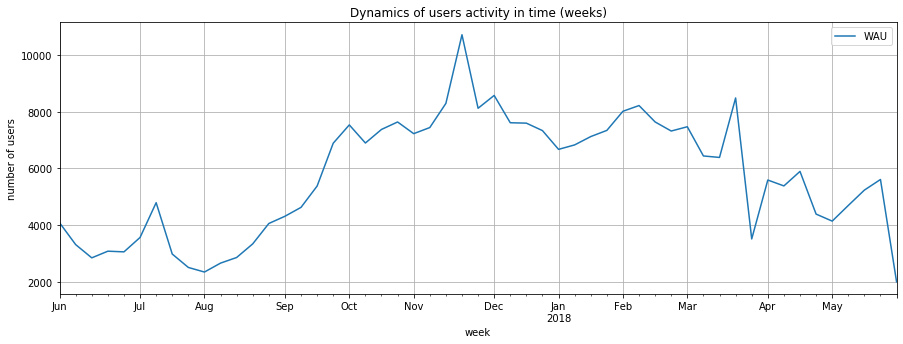

In [36]:
wau_dynamics.plot(x='week_session',
                 y='uid',
                 grid=True,
                 figsize=(15, 5),
                 label='WAU')

plt.title('Dynamics of users activity in time (weeks)')
plt.legend()
plt.xlabel("week")
plt.ylabel("number of users")
plt.show() 

In [37]:
# transforming timestamp as 1st month day 
visits['month_session'] = visits['start_session'].astype('datetime64[M]')

In [38]:
mau_dynamics = visits.groupby(['month_session']).agg({'uid' : 'nunique'}).reset_index()

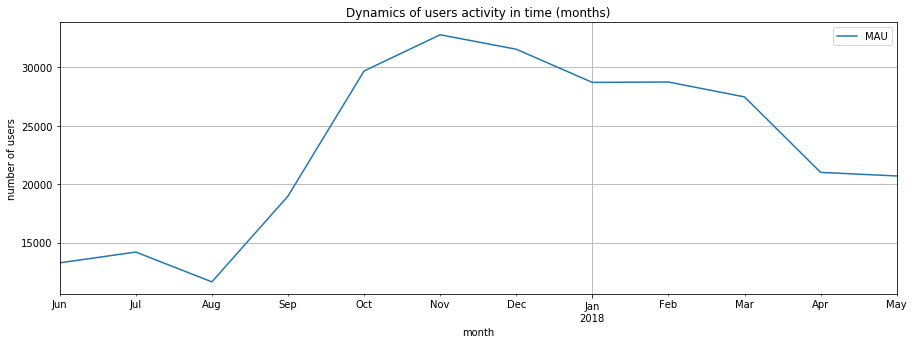

In [39]:
mau_dynamics.plot(x='month_session',
                 y='uid',
                 grid=True,
                 figsize=(15, 5),
                 label='MAU')

plt.title('Dynamics of users activity in time (months)')
plt.legend()
plt.xlabel("month")
plt.ylabel("number of users")
plt.show() 

Activity of users increases at the end of the year, starting September, and subsides in summer, especially August. Thus, a certain seasonality is visible on all charts: in summer, user activity is lower, the maximum drop is in August. This may be explained by vacations, when users prefer trips to events (btw less of them are in summer). Since September activity has been growing very strongly (in parallel with the increase in number of events, premieres, etc.), decreases after February, subsides in April.

### User sessions

In [40]:
sessions_per_user = visits.groupby(['date_session']).agg({'uid' : ['count', 'nunique']}).reset_index()

In [41]:
sessions_per_user.columns = ['date_session', 'n_sessions', 'n_users']

In [42]:
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)

In [43]:
sessions_per_user

,date_session,n_sessions,n_users,sessions_per_user
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024
...,...,...,...,...
359,2018-05-27,672,620,1.083871
360,2018-05-28,1156,1039,1.112608
361,2018-05-29,1035,948,1.091772
362,2018-05-30,1410,1289,1.093871


In [44]:
print('Average number of sessions daily', sessions_per_user['sessions_per_user'].mean())

Average number of sessions daily 1.082169644003972


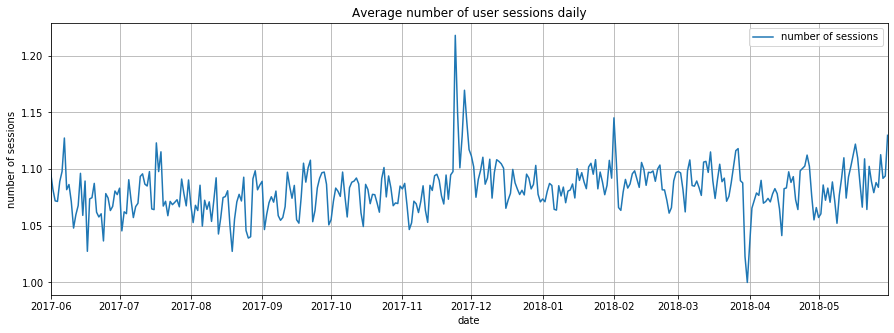

In [45]:
sessions_per_user.plot(x='date_session',
                 y='sessions_per_user',
                 grid=True,
                 figsize=(15, 5),
                 label='number of sessions')

plt.title('Average number of user sessions daily')
plt.legend()
plt.xlabel("date")
plt.ylabel("number of sessions")
plt.show()

Average number of user sessions daily is one session. 

### Average session load (ASL)

In [46]:
# let's convert time to seconds 
visits['session_duration_sec'] = (
    visits['end_session'] - visits['start_session']
).dt.seconds

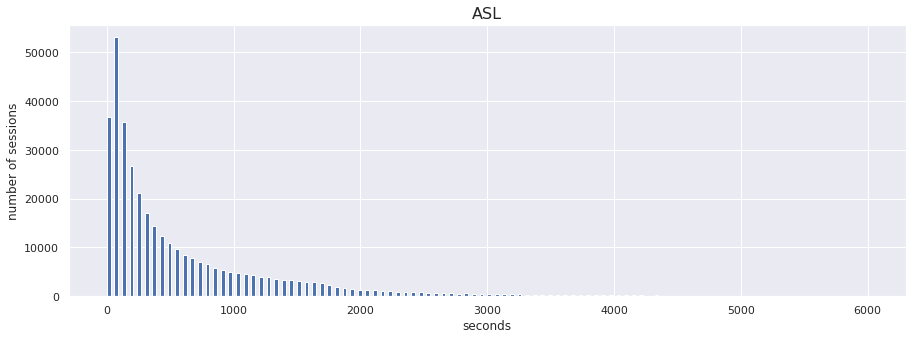

In [47]:
sns.set()
visits['session_duration_sec'].hist(
    bins= 200, 
    range = (0,6000),
    figsize = (15,5)
).set_title('ASL', fontsize=16)

plt.xlabel("seconds")
plt.ylabel("number of sessions")
plt.show()

The distribution is uneven. Therefore, the average number will not give us anything, let's better calculate the mode to determine the average session time.

In [48]:
print(visits['session_duration_sec'].mode()[0])

60


Typical user session is 60 seconds long.

### Retention Rate 

Let's do **cohort analysis** and understand how RR is changing in time. What's about 2nd month RR?

In [49]:
# dataframe with first visit date and merging with main df
first_activity_date = visits.groupby(['uid'])['start_session'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='uid')

In [50]:
# column with month cohorts 
visits['first_month'] = visits['first_activity_date'].astype('datetime64[M]')

In [51]:
# defining cohorts  
visits['cohort_lifetime'] = (
    visits['month_session'] - visits['first_month']
) 
visits['cohort_lifetime'] = (visits['cohort_lifetime'] / np.timedelta64(1, 'M')).round().astype('int') 

In [52]:
# aggregated table with cohorts  
cohorts = (
    visits.groupby(['first_month', 'cohort_lifetime'])
    .agg({'uid' : 'nunique'})
).reset_index()

In [53]:
cohorts

,first_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [54]:
# calculating number of users in cohorts  
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_month', 'uid']]

initial_users_count.columns = ['first_month', 'cohort_users']

In [55]:
# merging with main df  
cohorts = cohorts.merge(initial_users_count, on='first_month')

In [56]:
# calculating retention
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

# aggregated table  
retention_pivot = cohorts.pivot_table(
    index='first_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)

retention_pivot.index = retention_pivot.index.strftime("%m/%Y")

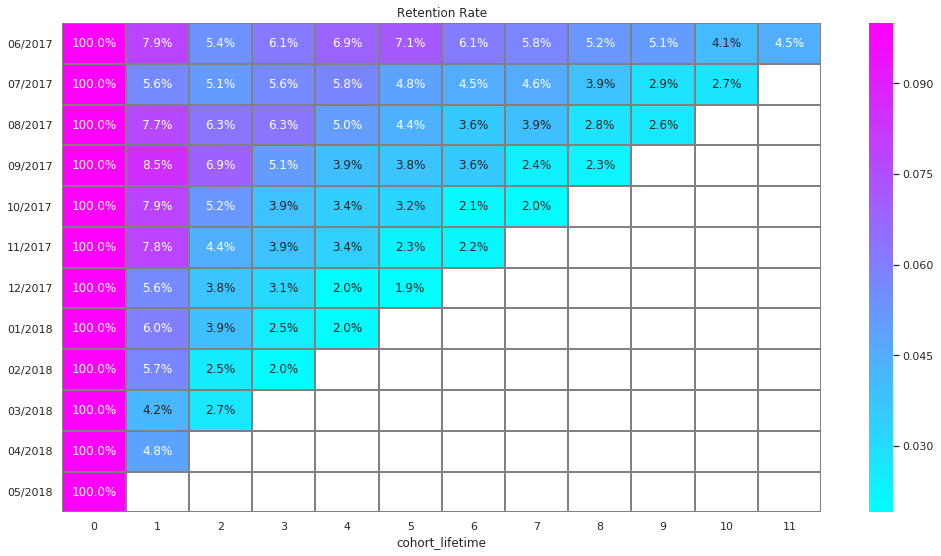

In [57]:
# let's visualize RR with heatmap
sns.set(style='white')
plt.figure(figsize=(17, 9))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, 
            annot=True, 
            fmt='.1%', 
            linewidths=1, 
            linecolor='grey', 
            vmax=0.10,
            cmap="cool")
plt.show()

What's about 2nd month Retention Rate?

In [58]:
print('2nd month RR is {:.1%}'
      .format(retention_pivot[1].mean()))

2nd month RR is 6.5%


### Recap

- DAU: 908 users, WAU: 5716 users, MAU: 23228 users.
- Seasonal activity is distributed as follows: we see a lull starting in April and then throughout the summer. Since September visits has been steadily growing, reaching a maximum in mid-November.
- Average number of sessions is 1.08. 
- ASL is 60 seconds.
- Only few users return after initial purchase. 2nd month RR is 6.5%.

## 2.2. Sales

### Time till first purchase by site visitor

In [59]:
first_activity_date = first_activity_date.reset_index()
first_activity_date.head(10)

,uid,first_activity_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
5,397399764396656,2018-01-18 12:32:00
6,407573351275847,2017-06-17 13:40:00
7,498809019029702,2018-02-21 22:09:00
8,526778907996220,2017-10-21 17:51:00
9,577434573913691,2018-01-28 14:15:00


In [60]:
first_buy_date = orders.groupby(['uid'])['order_date'].min().reset_index()

In [61]:
first_buy_date.head(10)

,uid,order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
5,3077748354309989,2018-03-03 12:33:00
6,3605148382144603,2017-09-21 20:56:00
7,3753586865891862,2018-03-03 13:50:00
8,4808417689019433,2018-01-09 23:32:00
9,4992223027560440,2018-04-04 13:54:00


In [62]:
# merging on uid
first_buy_date = first_buy_date.merge(first_activity_date, on='uid')

In [63]:
first_buy_date['days_till_buy'] = (
    first_buy_date['order_date'] - first_buy_date['first_activity_date']
)

In [64]:
first_buy_date['days_till_buy'] = (first_buy_date['days_till_buy'] / np.timedelta64(1, 'D')).round().astype('int')

In [65]:
first_buy_date.head()

,uid,order_date,first_activity_date,days_till_buy
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


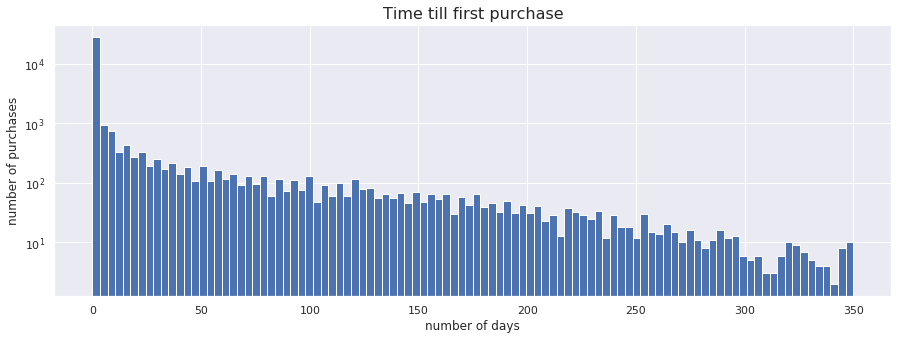

In [66]:
sns.set()
first_buy_date['days_till_buy'].hist(
    log = True,
    bins = 100, 
    range = (0,350),
    figsize = (15,5)
).set_title('Time till first purchase', fontsize=16)

plt.xlabel("number of days")
plt.ylabel("number of purchases")
plt.show()

The distribution does not look like normal, so let's look at the median, not the average.

In [67]:
print('Purchase happens on {} day in average.'
      .format(first_buy_date['days_till_buy'].mode()[0]))

Purchase happens on 0 day in average.


Most users make a purchase during their first site visit. 

### Average amount of purchases per user in 1-month and 6-month period

How many purchases a month?  

In [68]:
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

In [69]:
purchases_per_user = (
    orders[orders['order_month'] != '2018-06-01'].groupby(['order_month']).agg({'uid' : ['count', 'nunique']}).reset_index()
)

In [70]:
purchases_per_user.columns = ['order_month', 'n_purchases', 'n_users'] 

In [71]:
purchases_per_user['purchases_per_user'] = purchases_per_user['n_purchases'] / purchases_per_user['n_users']

In [72]:
purchases_per_user

,order_month,n_purchases,n_users,purchases_per_user
0,2017-06-01,2354,2023,1.163618
1,2017-07-01,2363,1984,1.191028
2,2017-08-01,1807,1472,1.227582
3,2017-09-01,3387,2750,1.231636
4,2017-10-01,5679,4675,1.214759
5,2017-11-01,5659,4547,1.244557
6,2017-12-01,6218,4942,1.258195
7,2018-01-01,4721,3898,1.211134
8,2018-02-01,5281,4258,1.240254
9,2018-03-01,5326,4181,1.273858


In [73]:
purchases_per_user['purchases_per_user'].mean().round(2)

1.22

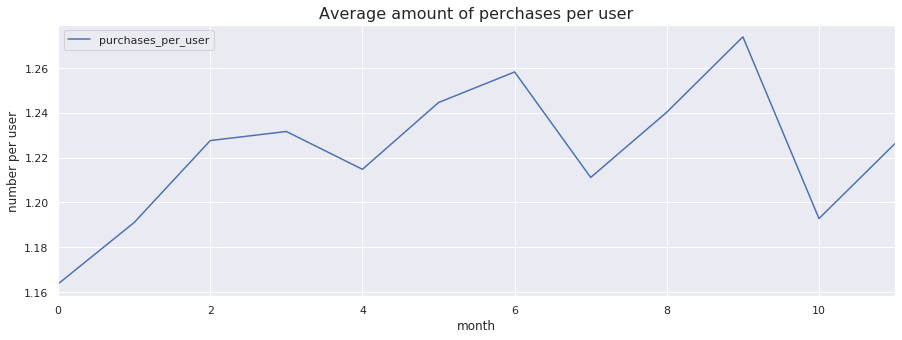

In [74]:
purchases_per_user['purchases_per_user'].plot(figsize=(15,5))

plt.title('Average amount of perchases per user', fontsize=16)

plt.xlabel("month")
plt.ylabel("number per user")
plt.legend()
plt.show()

On average there are 1.2 purchases per month per user. In dynamics this indicator increases during some months (June and September), which may be due to seasonality or advertising campaigns.

Let's look at average amount of purchases in 6-month period. 

In [75]:
# defining 1 month of purchase for every user  
first_purchases = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_purchases.columns = ['uid', 'first_purchase_month']

In [76]:
orders = orders.merge(first_purchases, on='uid')

In [77]:
# defining cohorts  
orders['lifetime'] = ((orders['order_month'] - orders['first_purchase_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [78]:
# aggregated table
orders_purchases = orders.groupby(['first_purchase_month', 'lifetime']).agg({'uid':['count', 'nunique']}).reset_index()
orders_purchases.columns = ['first_purchase_month', 'lifetime', 'n_orders', 'n_users']

In [79]:
# calculating number of purchases per user in cohorts 
orders_purchases['orders_per_user'] = orders_purchases['n_orders'] / orders_purchases['n_users']

orders_purchases['first_purchase_month'] = orders_purchases['first_purchase_month'].dt.strftime('%Y-%m')


In [80]:
orders_purchases

,first_purchase_month,lifetime,n_orders,n_users,orders_per_user
0,2017-06,0,2354,2023,1.163618
1,2017-06,1,177,61,2.901639
2,2017-06,2,174,50,3.480000
3,2017-06,3,226,54,4.185185
4,2017-06,4,292,88,3.318182
...,...,...,...,...,...
74,2018-03,2,176,58,3.034483
75,2018-04,0,2495,2276,1.096221
76,2018-04,1,195,69,2.826087
77,2018-05,0,3249,2988,1.087349


In [81]:
# aggregated table with purchase rate per user in cohorts  
cohorts_purchases = (
    orders_purchases.pivot_table(
        index = 'first_purchase_month', 
        columns = 'lifetime', 
        values = 'orders_per_user', 
        aggfunc = 'mean')
)

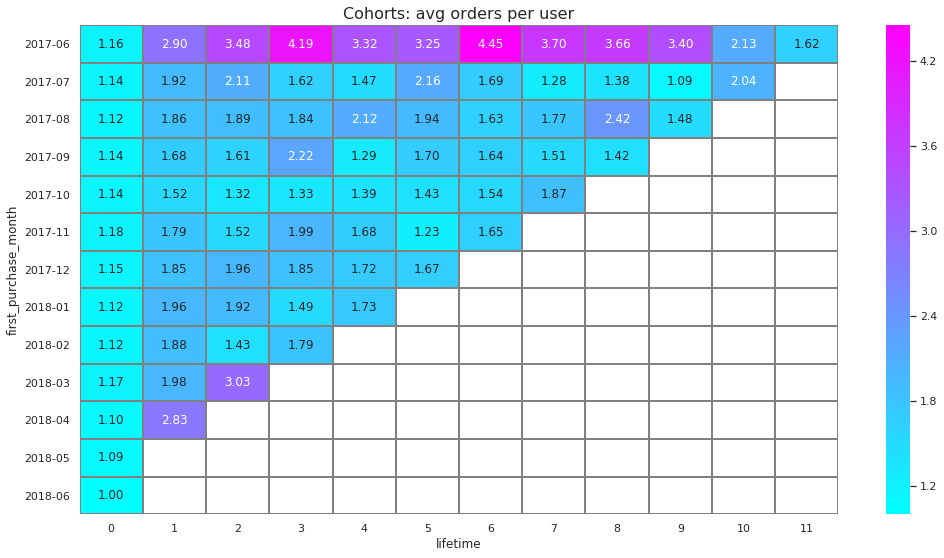

In [82]:
sns.set(style='white')
plt.figure(figsize=(17, 9))
plt.title('Cohorts: avg orders per user', fontsize=16)

sns.heatmap(cohorts_purchases, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='grey',
            cmap="cool")

plt.show()

In [83]:
cohorts_purchases[5].mean().round(2)

1.91

On average there are 1.91 purchases per user for 6 months.

### Average check in one day and on timeline  

What's user's average check?

In [84]:
orders.head()

,order_date,revenue,uid,order_month,first_purchase_month,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0


In [85]:
avg_check = orders.groupby('order_date')['revenue'].agg(['count', 'sum']).reset_index()

In [86]:
avg_check['avg_check'] = avg_check['sum'] / avg_check['count']

In [87]:
avg_check['avg_check'].mean().round(2)

4.99

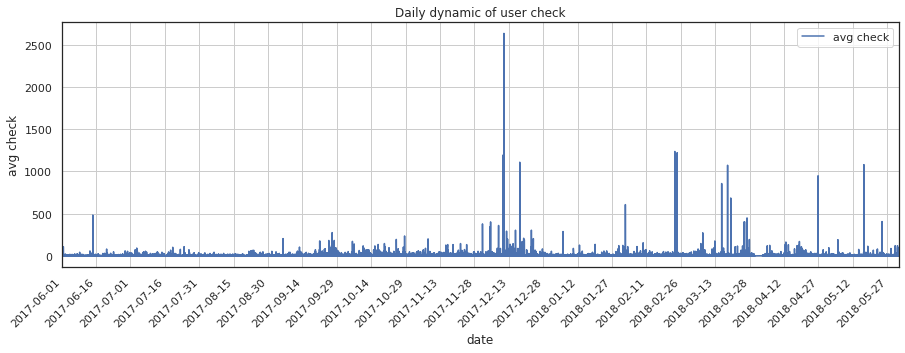

In [88]:
avg_check.plot(x='order_date',
                 y='avg_check',
                 grid=True,
                 figsize=(15, 5),
                 label='avg check')

plt.title('Daily dynamic of user check')
plt.legend()
plt.xlabel("date")
plt.ylabel("avg check")
plt.xticks(np.arange(avg_check['order_date'].min(), 
                     avg_check['order_date'].max() + pd.to_timedelta('1 day'), 
                     pd.to_timedelta('15 day')), 
                     rotation = 45)
plt.show() 

The average daily check is 5 units. Timeline shows the days when the check increases (perhaps these are promotions or popular events / sales openings).

### LTV per user in cohorts on average for 6 months 

In [89]:
# date of first purchase  
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()

In [90]:
first_orders

,uid,order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [91]:
first_orders.columns = ['uid', 'first_order_month']

In [92]:
# amount of users on every month  
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)

In [93]:
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [94]:
# ltv is calculated from gross profit, marginality is needed
margin_rate = 1

In [95]:
# adding first month of purchase to purchases df  
orders_first_month = pd.merge(orders, first_orders, on='uid')

In [96]:
cohorts = (
    orders_first_month.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

In [97]:
# adding amount of users made purchase on every month  
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [98]:
report

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [99]:
# defining gross profit (revenue * margin rate)
report['gp'] = report['revenue'] * margin_rate

# adding cohorts age  
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')

report['age'] = report['age'].round().astype('int')

In [100]:
# calculating ltv
report['ltv'] = report['gp'] / report['n_buyers']

In [101]:
report

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,13925.76,0,4.660562


In [102]:
# aggregated table with cohorts  
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2)

output.fillna('')

output.index = output.index.strftime("%m/%Y")

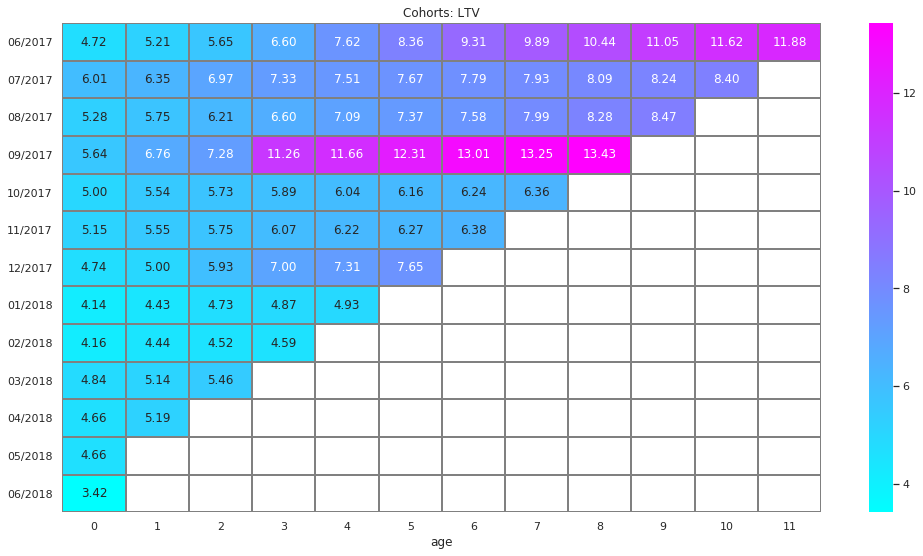

In [103]:
sns.set(style='white')
plt.figure(figsize=(17, 9))
plt.title('Cohorts: LTV')

sns.heatmap(output.cumsum(axis=1), 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='grey',
            cmap="cool")

plt.show()

After we calculated the cumulative LTV for each cohort, let's look at average value for the 6th month (for those cohorts that have it).

In [104]:
# avg ltv
output.cumsum(axis=1)[5].mean().round(2)

7.97

On average users bring 7.97 units in 6 months of the cohort's life.

### Recap

- Users mostly make a purchase on the same day as they visit the site.
- The average number of purchases per user is 1.2 purchases.
- The average check is 5 units.
- The average LTV by cohorts for 6 months is 7.97 conventional units. 
- The most profitable cohorts are June and September ones.

## 2.3. Marketing

### Marketing costs: total, by traffic channels, in dynamics 

How much money did we spend on marketing (in total, by sources and in time)?

In [105]:
costs

,source_id,ad_date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [106]:
print('Overall marketing costs are', costs['costs'].sum())

Overall marketing costs are 329131.62


Let's look how it's distributed by channels. 

In [107]:
costs_per_source = costs.groupby('source_id')['costs'].agg('sum').sort_values(ascending=False).reset_index()

In [108]:
costs_per_source

,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


We spent most on the 3rd source, and the least on the 9th. It will be interesting to analyze ROMI.

Now let's look at the distribution of costs by sources in monthly dynamics.

In [109]:
costs['ad_month'] = costs['ad_date'].astype('datetime64[M]')

In [110]:
sources_marketing = costs.pivot_table(
    index='ad_month',
    columns='source_id',
    values='costs',
    aggfunc='sum'
).reset_index() 

In [111]:
sources_marketing.columns = ['ad_month', 'source_1', 'source_2', 'source_3', 'source_4', 'source_5', 'source_9', 'source_10']

In [112]:
sources_marketing

,ad_month,source_1,source_2,source_3,source_4,source_5,source_9,source_10
0,2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
1,2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2,2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
3,2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
4,2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
5,2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
6,2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
7,2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
8,2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88
9,2018-03-01,1893.09,3943.14,13080.85,5961.87,4529.62,480.29,526.41


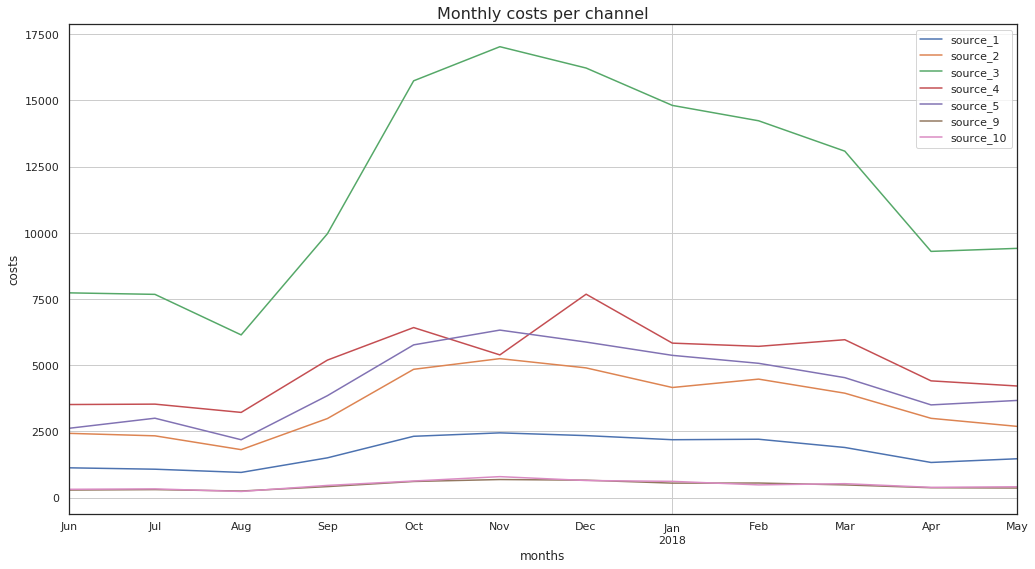

In [113]:
sources_marketing.plot(x='ad_month',
                 y=['source_1', 'source_2', 'source_3', 'source_4', 'source_5', 'source_9', 'source_10'],
                 grid=True,
                 figsize=(17, 9)
)

plt.title('Monthly costs per channel', fontsize=16)
plt.legend()
plt.xlabel("months")
plt.ylabel("costs")

plt.show() 

The 3rd traffic source stands out the most, almost half of money has been spent on it. We spent the least on the 9th and 10th sources.

### Average CAC per user, per channel and in dynamics 

Let's find **average CAC** per user.

In [114]:
monthly_costs = costs.groupby('ad_month')['costs'].sum().reset_index()

In [115]:
report_new = pd.merge(
    report, 
    monthly_costs, 
    left_on='first_order_month', 
    right_on='ad_month'
)

In [116]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

In [117]:
report_new['cac'].mean().round(2)

9.32

In [118]:
cac = costs['costs'].sum() / orders['uid'].nunique()

In [119]:
cac.round(2)

9.01

Average CAC per user is 9.32. This is more than average LTV of 7.97 which **indicates the inefficiency of our costs**.

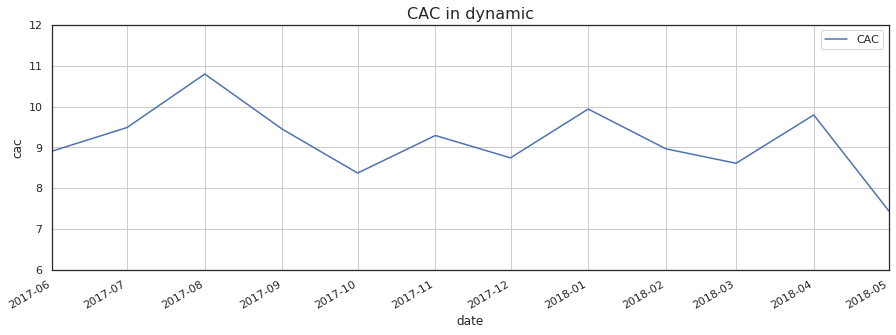

In [120]:
report_new.plot(x='ad_month',
                 y='cac',
                 grid=True,
                 figsize=(15, 5),
                 label='CAC')

plt.title('CAC in dynamic', fontsize=16)
plt.legend()
plt.xlabel("date")
plt.ylabel("cac")
plt.ylim(6, 12)
plt.show()

Now we'll find **CAC per each traffic source**. And we will reflect the change in metrics on graph. 

In [121]:
visits = visits.sort_values(by = 'start_session', ascending = True).reset_index()

In [122]:
# column with first traffic source for each user 
first_source = visits.groupby ('uid')['source_id'].first().reset_index()

In [123]:
first_source.columns = ['uid', 'source_id']

In [124]:
# merging sources with first purchase month 
orders_first_month = pd.merge (first_source, orders_first_month, on='uid')

In [125]:
# grouping by 1st month and source, finding users per cohort
orders_first_month_users = (
    orders_first_month.groupby(['first_order_month', 'source_id'])
    .agg({'uid' : 'nunique'})
    .reset_index()
)

In [140]:
# grouping by 1st month, following month, calculating revenue 
orders_first_month_revenue = (
    orders_first_month.groupby(['first_order_month', 'order_month', 'source_id'])
    .agg({'revenue' : 'sum'})
    .reset_index()
)

In [127]:
# merging tables on 1st month and source  
orders_fin = pd.merge(orders_first_month_users, 
                      orders_first_month_revenue, 
                      on=['first_order_month', 'source_id'])

In [128]:
# ltv
orders_fin['gp'] = orders_fin['revenue'] * margin_rate

orders_fin['ltv'] = orders_fin['revenue'] / orders_fin['uid']

In [129]:
# aggregated table with traffic costs and months  
costs_by_source = (
    costs.groupby(['ad_month', 'source_id'])
    .agg({'costs' : 'sum'})
    .reset_index()    
)

In [130]:
orders_fin.columns = ['first_order_month', 'source_id', 'uid', 'month', 'revenue', 'gp',
       'ltv']

In [131]:
costs_by_source.columns = ['month', 'source_id', 'costs']

In [132]:
# merging with ltv table on sources and months  
report_final = pd.merge(orders_fin, 
                      costs_by_source, 
                      on=['month', 'source_id'])

In [133]:
# cac 
report_final['cac'] = report_final['costs'] / report_final['uid']

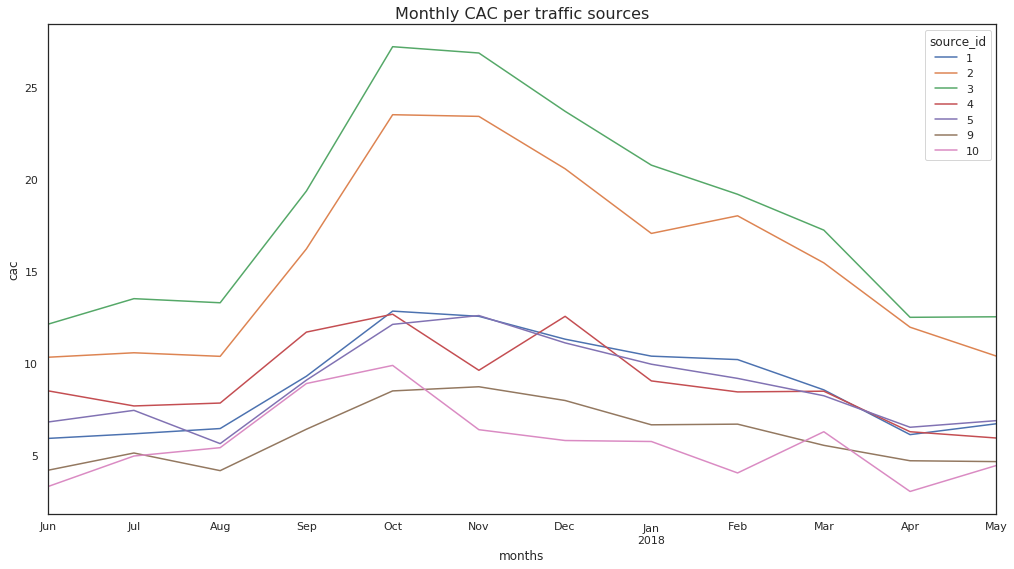

In [141]:
report_final.pivot_table(index = 'month', 
                         columns = 'source_id', 
                         values = 'cac', 
                         aggfunc = 'mean').plot(figsize=(17,9))

plt.title('Monthly CAC per traffic sources', fontsize=16)
plt.xlabel("months")
plt.ylabel("cac")
plt.show()

The most expensive are our costs on users attracted from 3 and 2 traffic sources from September 2017 to January 2018.

### ROMI per traffic source and payback by cohort

Let's look at the payback of marketing campaign **per traffic source** using cohort analysis.

In [135]:
# romi
report_final['romi'] = report_final['ltv'] / report_final['cac']

In [142]:
# adding cohort age to final report  
report_final['age'] = (
    report_final['month'] - report_final['first_order_month']
) / np.timedelta64(1, 'M')

report_final['age'] = report_final['age'].round().astype('int')

In [137]:
report_final

,first_order_month,source_id,uid,month,revenue,gp,ltv,costs,cac,romi,age
0,2017-06-01,1,190,2017-06-01,1378.70,1378.70,7.256316,1125.61,5.924263,1.224847,0
1,2017-06-01,1,190,2017-07-01,414.98,414.98,2.184105,1072.88,5.646737,0.386791,1
2,2017-07-01,1,160,2017-07-01,1166.70,1166.70,7.291875,1072.88,6.705500,1.087447,0
3,2017-06-01,1,190,2017-08-01,419.43,419.43,2.207526,951.81,5.009526,0.440666,2
4,2017-07-01,1,160,2017-08-01,175.31,175.31,1.095687,951.81,5.948813,0.184186,1
...,...,...,...,...,...,...,...,...,...,...,...
509,2017-10-01,10,209,2018-04-01,4.16,4.16,0.019904,388.25,1.857656,0.010715,6
510,2017-11-01,10,128,2018-04-01,6.36,6.36,0.049687,388.25,3.033203,0.016381,5
511,2018-02-01,10,123,2018-04-01,0.49,0.49,0.003984,388.25,3.156504,0.001262,2
512,2018-03-01,10,186,2018-04-01,12.71,12.71,0.068333,388.25,2.087366,0.032737,1


To better estimate the payback of marketing campaign per every source, let's make heat maps (in a cycle) for each of the traffic sources.

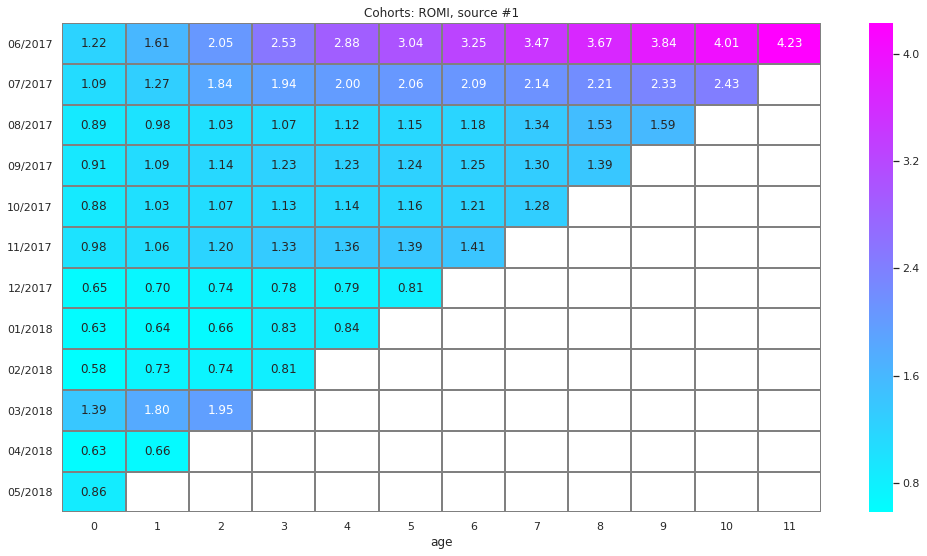

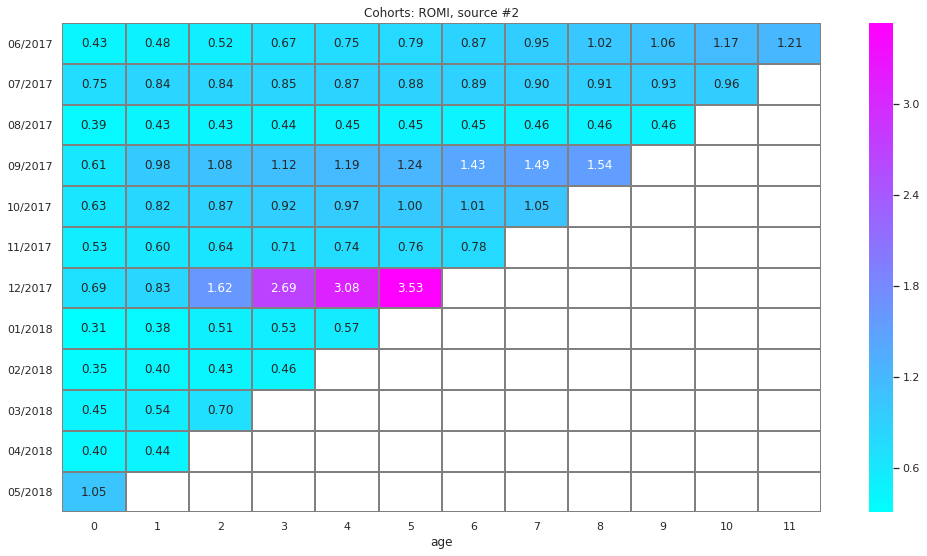

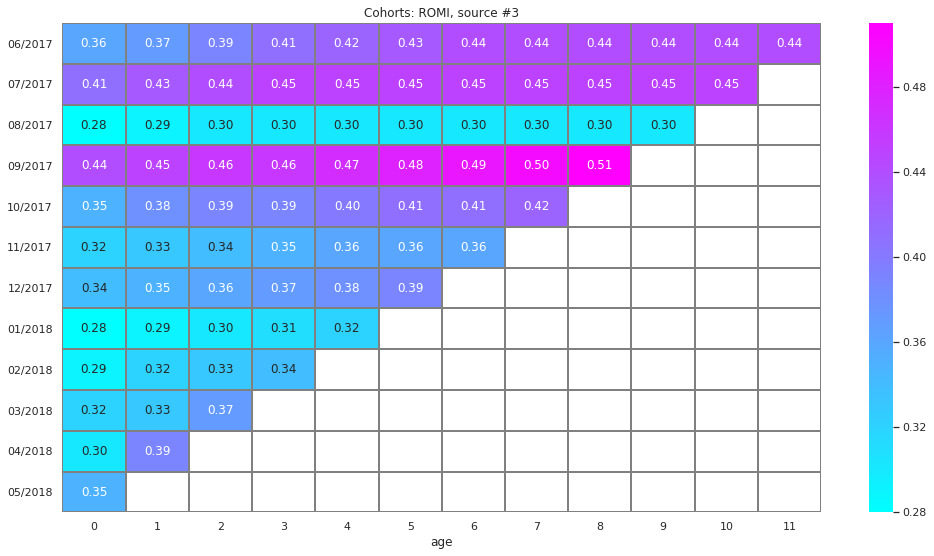

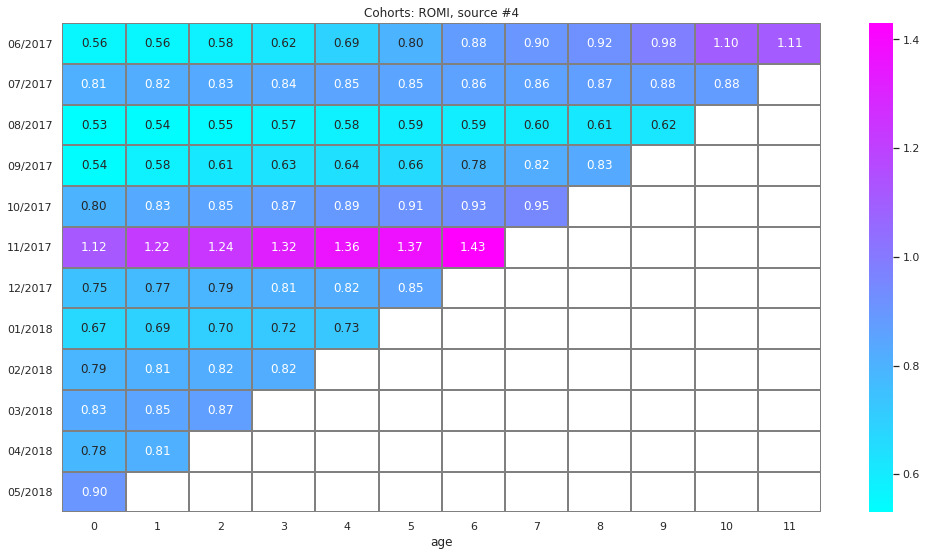

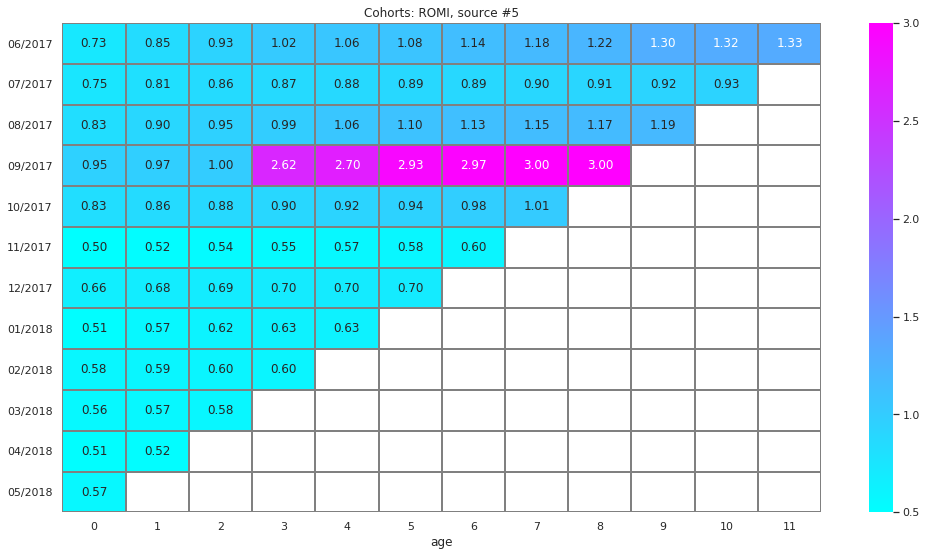

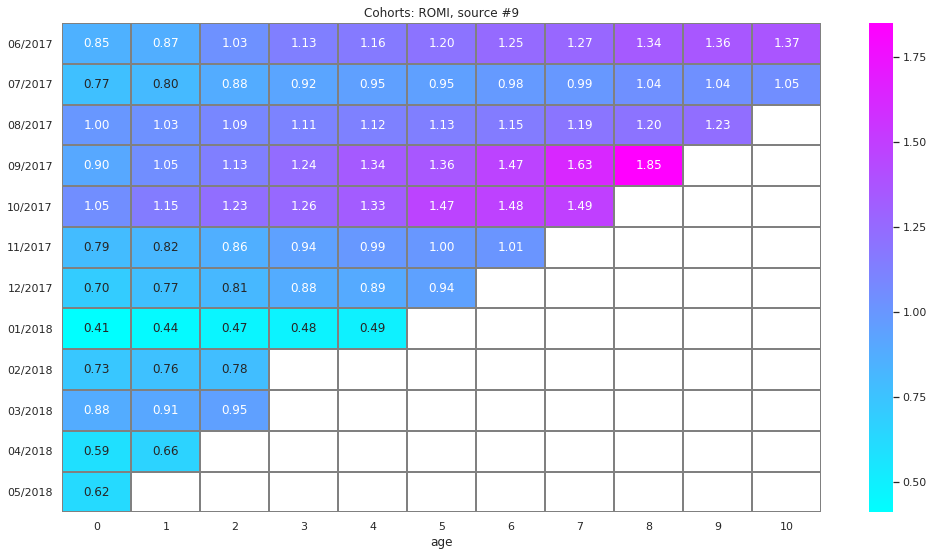

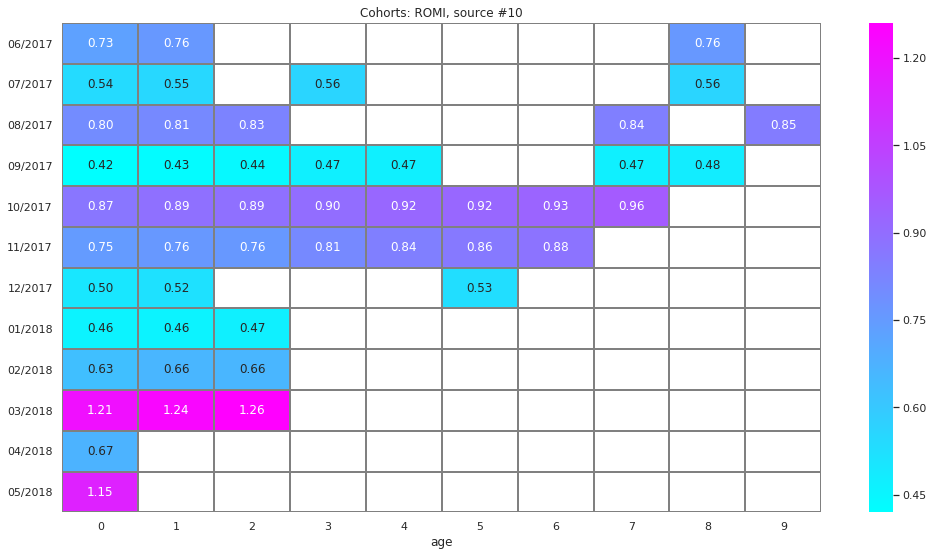

In [138]:
for source_id in report_final['source_id'].unique():
    output_romi = report_final.query('source_id == @source_id').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).round(2)
    
    output_romi.fillna('')
    output_romi.index = output_romi.index.strftime("%m/%Y")
    
    sns.set(style='white')
    plt.figure(figsize=(17, 9))
    plt.title('Cohorts: ROMI, source #{0}'.format(source_id))

    sns.heatmap(output_romi.cumsum(axis=1), 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='grey',
            cmap="cool")

    plt.show()

We can also look at average ROMI for each cohort age according to each source. Then we'll be able to understand what month of cohort life a traffic source pays off.

In [143]:
for source_id in report_final['source_id'].unique():
    romi_mean = report_final.query('source_id == @source_id').pivot_table(
            index='first_order_month', columns='age', values='romi', aggfunc='mean'
        ).round(2).cumsum(axis = 1).mean(axis = 0)

    print('Avg ROMI, traffic source #{0}'.format(source_id), romi_mean)  

Avg ROMI, traffic source #1 age
0     0.892500
1     1.051818
2     1.242000
3     1.294444
4     1.420000
5     1.550000
6     1.731667
7     1.906000
8     2.200000
9     2.586667
10    3.220000
11    4.230000
dtype: float64
Avg ROMI, traffic source #2 age
0     0.549167
1     0.612727
2     0.764000
3     0.932222
4     1.077500
5     1.235714
6     0.905000
7     0.970000
8     0.982500
9     0.816667
10    1.065000
11    1.210000
dtype: float64
Avg ROMI, traffic source #3 age
0     0.336667
1     0.357273
2     0.368000
3     0.375556
4     0.387500
5     0.402857
6     0.408333
7     0.422000
8     0.425000
9     0.396667
10    0.445000
11    0.440000
dtype: float64
Avg ROMI, traffic source #4 age
0     0.756667
1     0.770909
2     0.784000
3     0.800000
4     0.820000
5     0.861429
6     0.911667
7     0.826000
8     0.807500
9     0.826667
10    0.990000
11    1.110000
dtype: float64
Avg ROMI, traffic source #5 age
0     0.665000
1     0.712727
2     0.765000
3     0.986667


### Recap

- Total marketing costs are 329,000 units, almost half were spent on 3rd traffic source, which does not pay off.
- CAC on average exceeds LAC, so we need to optimize unit economics and marketing costs.
- ROMI by traffic sources: the most effective are 1, 2, 5 and 9 sources.

## 3. Conclusion and recommendations

**PRODUCT**

- DAU: 908 users, WAU: 5716 users, MAU: 23228 users.
- Seasonal activity is distributed as follows: we see a lull starting in April and then throughout the summer. Since September visits has been steadily growing, reaching a maximum in mid-November.
- Average number of sessions is 1.08 (equals one visit per user).
- Average ASL is 60 seconds. It should be taken into account that although the metric is important, it is not so essential for Afisha service, because users visit the platform to perform a target action (buying a ticket), and not spending a long time there (like in games).
- Retention Rate metric will be more indicative for us. In the second month of the cohorts life, average RR is 6.5%, which is quite low. This means that after initial purchase, less than 7 people out of 100 users return.

**SALES**

- Users mostly make a purchase on the same day as they visit the site.
- The average number of purchases per user is 1.2 purchases. In dynamics, this indicator increases on some months (June and September), which may be due to seasonality or advertising campaigns. On average there are 1.91 purchases per user for 6 months.
- The average check is 5 units.
- The average LTV by cohorts for 6 months is 7.97 units. At the same time, June and September cohorts show a very noticeable increase in profit from month to month. This intersects with growth in number of purchases per user in June and September.

**MARKETING**

- Total marketing costs are 329,000 units, almost half were spent on 3rd traffic source (141,000), which does not pay off. The least were spent on 9th and 10th sources (5,500).
- CAC on average exceeds LAC. This means that our marketing budget is being spent inefficiently, and we need to optimize costs depending on traffic sources and their effectiveness.
- The users who came from 3 and 2 traffic sources are the most expensive. Especially in the autumn months.
- ROMI by traffic sources:
    
    - 1st source pays off from 2nd month of the cohort's life
    - 2nd, 5th and 9th sources pay off from 4 month of the cohort's life
    - 3rd source does not pay off at all (does not even beat half of the costs on marketing campaign) 
    - 4th source pays off only on the 11th month of the cohort's life
    - 10 source does not pay off either.

**Recommendations**: 

- we can discuss cost reduction for inefficient traffic channels, so that average CAC is at level of 7-7.5 units;
- it is highly recommended to reduce marketing budget on 3rd traffic sources, it is the most ineffective while almost half of the budget is spent on it; 
- we could pay more attention to 1st, 5th and 9th traffic sources and redistribute the budget in their favor;
- platform has low RR, we could consider measures to facilitate metric growth - for example, make discounts or other offers to those who consider second purchase in the same month;
- since profit from June and September cohorts shows a very noticeable increase from month to month, we could try to increase costs on ad campaigns via effective traffic sources on these months.